# Feature Selection

Feature selection… is the process of selecting a subset of relevant features for use in model construction


In [1]:
import sys
sys.path.append('/Users/griggles/Documents/FLATIRON/PROJECT_2')
from masseuse import Masseuse
m = Masseuse(csv_dir='/Users/griggles/Documents/FLATIRON/PROJECT_2/csv/')
data = m.build_data()
data.shape

/Users/griggles/Documents/FLATIRON/PROJECT_2/masseuse.py:90: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  self.dfs['mf'] = self.dfs['mf'].convert_objects(convert_numeric=True)


(3920, 12)

## Top reasons to use feature selection are:
* It enables the machine learning algorithm to train faster.
* It reduces the complexity of a model and makes it easier to interpret.
* It improves the accuracy of a model if the right subset is chosen.
* It reduces overfitting.

In [2]:
#create dummy variables
#don't drop a category - just don't use intercept when modelling 
#to avoid multicollinearity (whatever that means)
import pandas as pd

df = pd.get_dummies(data, columns=['continent'])

## Types of Feature Selection

* Filter Methods
* Wrapper Methods
* Embedded Methods

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

#columns = "age sex bmi map tc ldl hdl tch ltg glu y".split() # Declare the columns names
#diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
#df = pd.read_csv('diabetes.tab.txt', sep='\t', lineterminator='\n')
#df.columns= columns
#features = df.iloc[:,:-1]
#target = df.y

features = df.iloc[:,1:]
target = df['fertility']

In [4]:
#features['female'] = pd.get_dummies(features['sex'],drop_first=True)
#features.drop(columns=['sex'], inplace=True)

In [5]:
features.head()

mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                               
ALB          1984                58.2                 5.390937   
             1985                54.0                 5.399862   
             1986                50.4                 5.413536   
             1987                47.2                 5.417392   
             1988                44.5                 5.423440   

                    mort_rate_infant  pop_percentage_under_14  \
Country Code Years                                              
ALB          1984               48.9                34.310923   
             1985               45.7                33.987349   
             1986               42.9                33.709853   
             1987               40.5                33.476210   
             1988               38.3                33.263863   

                    pop_percentage_15_to_64  life_expectancy     density  \
Country Code Years                                                         
ALB          1984                 60.298140           71.134  106.001058   
             1985                 60.612789           71.388  108.202993   
             1986                 60.876611           71.605  110.315146   
             1987                 61.106398           71.760  112.540328   
             1988                 61.312697           71.843  114.683796   

                           gdp  long term orientation  \
Country Code Years                                      
ALB          1984   662.520052                   61.0   
             1985   662.914793                   61.0   
             1986   719.157296                   61.0   
             1987   699.384292                   61.0   
             1988   676.566733                   61.0   

                    indulgence vs restraint  continent_Africa  \
Country Code Years                                              
ALB          1984                      15.0                 0   
             1985                      15.0                 0   
             1986                      15.0                 0   
             1987                      15.0                 0   
             1988                      15.0                 0   

                    continent_Americas  continent_Asia  continent_Europe  \
Country Code Years                                                         
ALB          1984                    0               0                 1   
             1985                    0               0                 1   
             1986                    0               0                 1   
             1987                    0               0                 1   
             1988                    0               0                 1   

                    continent_Oceania  
Country Code Years                     
ALB          1984                   0  
             1985                   0  
             1986                   0  
             1987                   0  
             1988                   0

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=32,test_size=0.2)


If you have multiple predictor variables in a regression, here is advice from Tabachnick & Fidell, Using Multivariate Statistics (k is the number of predictors)

a minimum N > 50 + (8*k) for tests of multiple R

a minimum N > 104 + k for tests of individual predictors

In [7]:
from sklearn import preprocessing
from sklearn import pipeline

scaler = preprocessing.StandardScaler()
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train.iloc[:,:-1]

mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                               
ARG          1983                34.7                 8.457380   
MKD          2012                10.4                11.906785   
UGA          2008                88.8                 2.295712   
DNK          1970                16.6                12.296033   
THA          2012                12.1                 9.492156   
TZA          1990               165.5                 2.710678   
MKD          2008                11.5                11.381083   
ARG          1980                43.5                 8.211141   
IND          1972               205.9                 3.411637   
COL          2005                21.6                 5.179314   
PRT          2015                 3.7                20.738634   
SGP          2010                 2.8                 9.019556   
NZL          1985                13.8                10.334505   
ISL          1998                 4.6                11.493084   
THA          1965               121.8                 3.433011   
IND          2005                74.5                 4.768170   
FIN          2015                 2.4                20.264464   
ALB          2007                14.8                 9.345029   
FIN          1966                19.3                 8.266896   
VNM          1987                58.2                 5.588914   
TTO          1994                32.3                 6.024227   
BFA          2011               109.4                 2.461207   
RWA          1996               184.7                 2.394145   
GRC          2000                 6.4                16.384173   
SLV          2001                31.1                 5.666173   
ZMB          1987               177.5                 2.694171   
ZWE          1981               101.0                 2.986004   
DNK          2007                 4.5                15.657966   
IRL          1968                24.1                11.146086   
ITA          1969                35.1                10.886260   
...                               ...                      ...   
AUT          2009                 4.4                17.505655   
AUS          1980                13.0                 9.614698   
PAK          1978               169.0                 3.822038   
UGA          1986               189.2                 2.661094   
KOR          1991                14.2                 5.400010   
CHN          1969               117.2                 3.711719   
USA          2004                 8.1                12.264846   
IND          2008                64.7                 4.984313   
DEU          1981                14.1                15.529767   
ARG          1971                71.5                 7.168795   
HRV          2004                 7.0                17.088861   
NZL          1999                 7.6                11.759707   
GBR          2006                 5.9                16.124603   
NLD          1999                 6.3                13.504309   
VEN          2005                18.5                 4.883539   
EGY          1997                56.7                 4.842230   
ALB          1993                35.4                 6.036463   
GBR          1981                13.4                15.074400   
EGY          1966               260.1                 4.136879   
ZMB          1996               179.6                 2.664210   
PAK          1967               206.5                 3.895837   
CAN          1979                13.3                 9.235586   
SLV          1999                34.8                 5.345511   
BFA          1976               273.6                 3.046460   
TZA          2011                69.5                 3.088386   
MAR          2006                38.2                 5.832942   
RUS          2005                13.8                13.819102   
GHA          1974               190.8                 2.5343

In [10]:
scaler.fit(X_train.iloc[:,:-5])
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,:-5]), columns=X_train.columns[:-5], index=X_train.index)

#ADD BACK CATEGORICAL VARIABLES
#continent_Africa	continent_Americas	continent_Asia	continent_Europe

features_scaled_train['continent_Africa']= X_train.continent_Africa
features_scaled_train['continent_Americas']= X_train.continent_Americas
features_scaled_train['continent_Asia']= X_train.continent_Asia
features_scaled_train['continent_Europe']= X_train.continent_Europe
features_scaled_train['continent_Oceania']= X_train.continent_Oceania


features_scaled_train.head()


mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                               
ARG          1983           -0.307779                -0.024773   
MKD          2012           -0.667287                 0.637140   
UGA          2008            0.492606                -1.207148   
DNK          1970           -0.575561                 0.711834   
THA          2012           -0.642136                 0.173792   

                    mort_rate_infant  pop_percentage_under_14  \
Country Code Years                                              
ARG          1983          -0.193960                 0.075722   
MKD          2012          -0.719355                -1.147304   
UGA          2008           0.457827                 1.779877   
DNK          1970          -0.602876                -0.601655   
THA          2012          -0.689616                -1.010237   

                    pop_percentage_15_to_64  life_expectancy   density  \
Country Code Years                                                       
ARG          1983                 -0.106248         0.197515 -0.288228   
MKD          2012                  1.404883         0.672136 -0.171710   
UGA          2008                 -2.008253        -1.256602 -0.047437   
DNK          1970                  0.441041         0.505936 -0.116139   
THA          2012                  1.540184         0.615301 -0.089291   

                         gdp  long term orientation  indulgence vs restraint  \
Country Code Years                                                             
ARG          1983  -0.386477              -0.945554                 0.628359   
MKD          2012  -0.309007               0.871127                -0.574762   
UGA          2008  -0.590696              -0.772536                 0.182759   
DNK          1970  -0.390831              -0.296739                 0.984839   
THA          2012  -0.232024              -0.426502                -0.129162   

                    continent_Africa  continent_Americas  continent_Asia  \
Country Code Years                                                         
ARG          1983                  0                   1               0   
MKD          2012                  0                   0               0   
UGA          2008                  1                   0               0   
DNK          1970                  0                   0               0   
THA          2012                  0                   0               1   

                    continent_Europe  continent_Oceania  
Country Code Years                                       
ARG          1983                  0                  0  
MKD          2012                  1                  0  
UGA          2008                  0                  0  
DNK          1970                  1                  0  
THA          2012                  0                  0

In [11]:
X_test.head()

mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                               
DNK          1998                 5.8                15.020549   
PER          1989                85.0                 3.939242   
GHA          1997               108.1                 2.998090   
ESP          1978                17.7                10.780642   
SGP          1990                 7.7                 5.598826   

                    mort_rate_infant  pop_percentage_under_14  \
Country Code Years                                              
DNK          1998                4.8                18.043540   
PER          1989               59.5                38.932739   
GHA          1997               69.1                42.391503   
ESP          1978               14.8                26.673601   
SGP          1990                6.2                21.460142   

                    pop_percentage_15_to_64  life_expectancy      density  \
Country Code Years                                                          
DNK          1998                 66.935912        76.139024   125.011053   
PER          1989                 57.128020        65.045000    16.694421   
GHA          1997                 54.610408        57.171000    77.387765   
ESP          1978                 62.545757        74.295610    73.799167   
SGP          1990                 72.941032        75.295122  4547.958209   

                             gdp  long term orientation  \
Country Code Years                                        
DNK          1998   33368.154851                   35.0   
PER          1989    1052.913452                   25.0   
GHA          1997     391.355680                    4.0   
ESP          1978    4344.606706                   48.0   
SGP          1990   11864.280213                   72.0   

                    indulgence vs restraint  continent_Africa  \
Country Code Years                                              
DNK          1998                      70.0                 0   
PER          1989                      46.0                 0   
GHA          1997                      72.0                 1   
ESP          1978                      44.0                 0   
SGP          1990                      46.0                 0   

                    continent_Americas  continent_Asia  continent_Europe  \
Country Code Years                                                         
DNK          1998                    0               0                 1   
PER          1989                    1               0                 0   
GHA          1997                    0               0                 0   
ESP          1978                    0               0                 1   
SGP          1990                    0               1                 0   

                    continent_Oceania  
Country Code Years                     
DNK          1998                   0  
PER          1989                   0  
GHA          1997                   0  
ESP          1978                   0  
SGP          1990                   0

In [12]:
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,:-5]), columns=X_test.columns[:-5], index=X_test.index)

features_scaled_test['continent_Africa']= X_test.continent_Africa
features_scaled_test['continent_Americas']= X_test.continent_Americas
features_scaled_test['continent_Asia']= X_test.continent_Asia
features_scaled_test['continent_Europe']= X_test.continent_Europe
features_scaled_test['continent_Oceania']= X_test.continent_Oceania

features_scaled_test.head()

mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                               
DNK          1998           -0.735342                 1.234647   
PER          1989            0.436387                -0.891768   
GHA          1997            0.778141                -1.072367   
ESP          1978           -0.559287                 0.421042   
SGP          1990           -0.707232                -0.573307   

                    mort_rate_infant  pop_percentage_under_14  \
Country Code Years                                              
DNK          1998          -0.828400                -1.076734   
PER          1989           0.527219                 0.814487   
GHA          1997           0.765134                 1.127629   
ESP          1978          -0.580572                -0.295404   
SGP          1990          -0.793704                -0.767409   

                    pop_percentage_15_to_64  life_expectancy   density  \
Country Code Years                                                       
DNK          1998                  0.820034         0.783231 -0.101982   
PER          1989                 -0.653323        -0.317179 -0.278558   
GHA          1997                 -1.031523        -1.098197 -0.179616   
ESP          1978                  0.160538         0.600384 -0.185467   
SGP          1990                  1.722133         0.699525  7.108260   

                         gdp  long term orientation  indulgence vs restraint  \
Country Code Years                                                             
DNK          1998   1.591649              -0.296739                 0.984839   
PER          1989  -0.550705              -0.729282                -0.084602   
GHA          1997  -0.594563              -1.637623                 1.073959   
ESP          1978  -0.332481               0.265567                -0.173722   
SGP          1990   0.166039               1.303671                -0.084602   

                    continent_Africa  continent_Americas  continent_Asia  \
Country Code Years                                                         
DNK          1998                  0                   0               0   
PER          1989                  0                   1               0   
GHA          1997                  1                   0               0   
ESP          1978                  0                   0               0   
SGP          1990                  0                   0               1   

                    continent_Europe  continent_Oceania  
Country Code Years                                       
DNK          1998                  1                  0  
PER          1989                  0                  0  
GHA          1997                  0                  0  
ESP          1978                  1                  0  
SGP          1990                  0                  0

In [13]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_135_train = pd.DataFrame(poly.fit_transform(X_train), index=X_train.index, columns=poly.get_feature_names(X_train.columns))
features_135_train.head()

mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                               
ARG          1983                34.7                 8.457380   
MKD          2012                10.4                11.906785   
UGA          2008                88.8                 2.295712   
DNK          1970                16.6                12.296033   
THA          2012                12.1                 9.492156   

                    mort_rate_infant  pop_percentage_under_14  \
Country Code Years                                              
ARG          1983               30.4                30.772815   
MKD          2012                9.2                17.264069   
UGA          2008               56.7                49.595811   
DNK          1970               13.9                23.290953   
THA          2012               10.4                18.778020   

                    pop_percentage_15_to_64  life_expectancy     density  \
Country Code Years                                                         
ARG          1983                 60.769806        70.234000   10.762906   
MKD          2012                 70.829147        75.019000   82.237748   
UGA          2008                 48.108477        55.574000  158.470027   
DNK          1970                 64.413015        73.343415  116.326575   
THA          2012                 71.729824        74.446000  132.795668   

                            gdp  long term orientation  \
Country Code Years                                       
ARG          1983   3530.131783                   20.0   
MKD          2012   4698.689476                   62.0   
UGA          2008    449.692818                   24.0   
DNK          1970   3464.456995                   35.0   
THA          2012   5859.887644                   32.0   

                    indulgence vs restraint         ...           \
Country Code Years                                  ...            
ARG          1983                      62.0         ...            
MKD          2012                      35.0         ...            
UGA          2008                      52.0         ...            
DNK          1970                      70.0         ...            
THA          2012                      45.0         ...            

                    continent_Americas^2  continent_Americas continent_Asia  \
Country Code Years                                                            
ARG          1983                    1.0                                0.0   
MKD          2012                    0.0                                0.0   
UGA          2008                    0.0                                0.0   
DNK          1970                    0.0                                0.0   
THA          2012                    0.0                                0.0   

                    continent_Americas continent_Europe  \
Country Code Years                                        
ARG          1983                                   0.0   
MKD          2012                                   0.0   
UGA          2008                                   0.0   
DNK          1970                                   0.0   
THA          2012                                   0.0   

                    continent_Americas continent_Oceania  continent_Asia^2  \
Country Code Years                                                           
ARG          1983                                    0.0               0.0   
MKD          2012                                    0.0               0.0   
UGA          2008                                    0.0               0.0   
DNK          1970                                    0.0               0.0   
THA          2012                                    0.0               1.0   

                    continent_Asia continent_Europe  \
Country Code Years                                    
ARG          1983                               0.0   
MKD 

In [14]:
pd.set_option('display.max_columns', 100)


In [15]:
features_135_train.head()

mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                               
ARG          1983                34.7                 8.457380   
MKD          2012                10.4                11.906785   
UGA          2008                88.8                 2.295712   
DNK          1970                16.6                12.296033   
THA          2012                12.1                 9.492156   

                    mort_rate_infant  pop_percentage_under_14  \
Country Code Years                                              
ARG          1983               30.4                30.772815   
MKD          2012                9.2                17.264069   
UGA          2008               56.7                49.595811   
DNK          1970               13.9                23.290953   
THA          2012               10.4                18.778020   

                    pop_percentage_15_to_64  life_expectancy     density  \
Country Code Years                                                         
ARG          1983                 60.769806        70.234000   10.762906   
MKD          2012                 70.829147        75.019000   82.237748   
UGA          2008                 48.108477        55.574000  158.470027   
DNK          1970                 64.413015        73.343415  116.326575   
THA          2012                 71.729824        74.446000  132.795668   

                            gdp  long term orientation  \
Country Code Years                                       
ARG          1983   3530.131783                   20.0   
MKD          2012   4698.689476                   62.0   
UGA          2008    449.692818                   24.0   
DNK          1970   3464.456995                   35.0   
THA          2012   5859.887644                   32.0   

                    indulgence vs restraint  continent_Africa  \
Country Code Years                                              
ARG          1983                      62.0               0.0   
MKD          2012                      35.0               0.0   
UGA          2008                      52.0               1.0   
DNK          1970                      70.0               0.0   
THA          2012                      45.0               0.0   

                    continent_Americas  continent_Asia  continent_Europe  \
Country Code Years                                                         
ARG          1983                  1.0             0.0               0.0   
MKD          2012                  0.0             0.0               1.0   
UGA          2008                  0.0             0.0               0.0   
DNK          1970                  0.0             0.0               1.0   
THA          2012                  0.0             1.0               0.0   

                    continent_Oceania  mort_rate_under_5^2  \
Country Code Years                                           
ARG          1983                 0.0              1204.09   
MKD          2012                 0.0               108.16   
UGA          2008                 0.0              7885.44   
DNK          1970                 0.0               275.56   
THA          2012                 0.0               146.41   

                    mort_rate_under_5 pop_percentage_above_65  \
Country Code Years                                              
ARG          1983                                  293.471072   
MKD          2012                                  123.830560   
UGA          2008                                  203.859265   
DNK          1970                                  204.114141   
THA          2012                                  114.855082   

                    mort_rate_under_5 mort_rate_infant  \
Country Code Years                                       
ARG          1983                              1054.88   
MKD          2012                                95.68   
UGA          2008                              50

In [16]:
features_135_test = pd.DataFrame(poly.fit_transform(X_test), index=X_test.index, columns=poly.get_feature_names(X_test.columns))
features_135_test.head()

mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                               
DNK          1998                 5.8                15.020549   
PER          1989                85.0                 3.939242   
GHA          1997               108.1                 2.998090   
ESP          1978                17.7                10.780642   
SGP          1990                 7.7                 5.598826   

                    mort_rate_infant  pop_percentage_under_14  \
Country Code Years                                              
DNK          1998                4.8                18.043540   
PER          1989               59.5                38.932739   
GHA          1997               69.1                42.391503   
ESP          1978               14.8                26.673601   
SGP          1990                6.2                21.460142   

                    pop_percentage_15_to_64  life_expectancy      density  \
Country Code Years                                                          
DNK          1998                 66.935912        76.139024   125.011053   
PER          1989                 57.128020        65.045000    16.694421   
GHA          1997                 54.610408        57.171000    77.387765   
ESP          1978                 62.545757        74.295610    73.799167   
SGP          1990                 72.941032        75.295122  4547.958209   

                             gdp  long term orientation  \
Country Code Years                                        
DNK          1998   33368.154851                   35.0   
PER          1989    1052.913452                   25.0   
GHA          1997     391.355680                    4.0   
ESP          1978    4344.606706                   48.0   
SGP          1990   11864.280213                   72.0   

                    indulgence vs restraint  continent_Africa  \
Country Code Years                                              
DNK          1998                      70.0               0.0   
PER          1989                      46.0               0.0   
GHA          1997                      72.0               1.0   
ESP          1978                      44.0               0.0   
SGP          1990                      46.0               0.0   

                    continent_Americas  continent_Asia  continent_Europe  \
Country Code Years                                                         
DNK          1998                  0.0             0.0               1.0   
PER          1989                  1.0             0.0               0.0   
GHA          1997                  0.0             0.0               0.0   
ESP          1978                  0.0             0.0               1.0   
SGP          1990                  0.0             1.0               0.0   

                    continent_Oceania  mort_rate_under_5^2  \
Country Code Years                                           
DNK          1998                 0.0                33.64   
PER          1989                 0.0              7225.00   
GHA          1997                 0.0             11685.61   
ESP          1978                 0.0               313.29   
SGP          1990                 0.0                59.29   

                    mort_rate_under_5 pop_percentage_above_65  \
Country Code Years                                              
DNK          1998                                   87.119181   
PER          1989                                  334.835543   
GHA          1997                                  324.093510   
ESP          1978                                  190.817367   
SGP          1990                                   43.110961   

                    mort_rate_under_5 mort_rate_infant  \
Country Code Years                                       
DNK          1998                                27.84   
PER          1989                              5057.50   
GHA          1997                  

# Filter Methods
Filter feature selection methods apply a statistical measure to assign a scoring to each feature. The features are ranked by the score and either selected to be kept or removed from the dataset. The methods are often univariate and consider the feature independently, or with regard to the dependent variable.

![alt text](Filter_1.png)

**Examples:** 
* F-Test
* Chi squared test 
* Information gain 
* Correlation coefficient scores

![alt text](FS1.webp)

In [17]:
from sklearn.feature_selection import VarianceThreshold


In [18]:
thresholder = VarianceThreshold(threshold=.5)

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [19]:
#REMOVE LOW VARIANCE VARIABLES

features_selected_train = variance_threshold_selector(features_135_train)

In [20]:
features_selected_train.head()

mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                               
ARG          1983                34.7                 8.457380   
MKD          2012                10.4                11.906785   
UGA          2008                88.8                 2.295712   
DNK          1970                16.6                12.296033   
THA          2012                12.1                 9.492156   

                    mort_rate_infant  pop_percentage_under_14  \
Country Code Years                                              
ARG          1983               30.4                30.772815   
MKD          2012                9.2                17.264069   
UGA          2008               56.7                49.595811   
DNK          1970               13.9                23.290953   
THA          2012               10.4                18.778020   

                    pop_percentage_15_to_64  life_expectancy     density  \
Country Code Years                                                         
ARG          1983                 60.769806        70.234000   10.762906   
MKD          2012                 70.829147        75.019000   82.237748   
UGA          2008                 48.108477        55.574000  158.470027   
DNK          1970                 64.413015        73.343415  116.326575   
THA          2012                 71.729824        74.446000  132.795668   

                            gdp  long term orientation  \
Country Code Years                                       
ARG          1983   3530.131783                   20.0   
MKD          2012   4698.689476                   62.0   
UGA          2008    449.692818                   24.0   
DNK          1970   3464.456995                   35.0   
THA          2012   5859.887644                   32.0   

                    indulgence vs restraint  mort_rate_under_5^2  \
Country Code Years                                                 
ARG          1983                      62.0              1204.09   
MKD          2012                      35.0               108.16   
UGA          2008                      52.0              7885.44   
DNK          1970                      70.0               275.56   
THA          2012                      45.0               146.41   

                    mort_rate_under_5 pop_percentage_above_65  \
Country Code Years                                              
ARG          1983                                  293.471072   
MKD          2012                                  123.830560   
UGA          2008                                  203.859265   
DNK          1970                                  204.114141   
THA          2012                                  114.855082   

                    mort_rate_under_5 mort_rate_infant  \
Country Code Years                                       
ARG          1983                              1054.88   
MKD          2012                                95.68   
UGA          2008                              5034.96   
DNK          1970                               230.74   
THA          2012                               125.84   

                    mort_rate_under_5 pop_percentage_under_14  \
Country Code Years                                              
ARG          1983                                 1067.816677   
MKD          2012                                  179.546315   
UGA          2008                                 4404.108012   
DNK          1970                                  386.629812   
THA          2012                                  227.214043   

                    mort_rate_under_5 pop_percentage_15_to_64  \
Country Code Years                                              
ARG          1983                                 2108.712252   
MKD          2012                                  736.623125   
UGA          2008                                 4272.032723   
DNK          1970                       

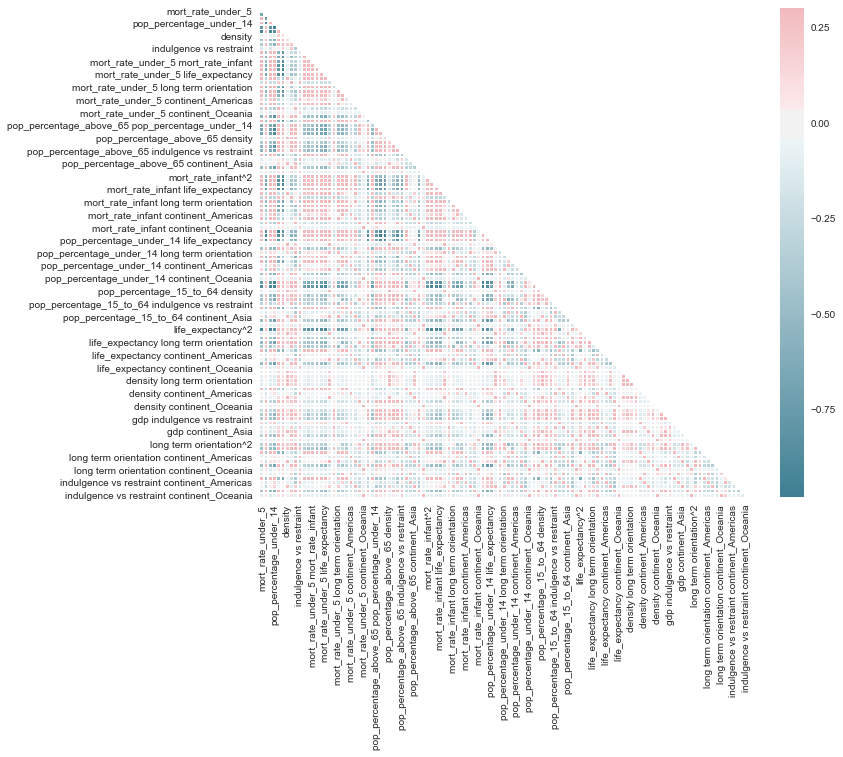

In [21]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

In [22]:
# Create correlation matrix
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix (so as not to include self-correlations of 1)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [23]:
def calculate_cols_to_drop(upper):
    #to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    shape = upper.shape
    print(shape)
    row_index = upper.index
    col_index = upper.columns
    to_drop = []
    
    for row in range(0, shape[0]):
        for col in range(0, shape[1]):
            #print(upper.iloc[row,col])
            if upper.iloc[row, col] > 0.95:
                if row_index[row] in to_drop or col_index[col] in to_drop:
                    pass
                else:
                    to_drop.append(col_index[col])
    
    temp = upper.drop(index= to_drop, columns=to_drop)
    
    print(len(to_drop))
    
    shape = temp.shape
    for row in range(0, shape[0]):
        for col in range(0, shape[1]):
            if temp.iloc[row, col] > 0.95:
                print("IT DIDN'T FUCKING WORK")
                print('row: ' + temp.index[row])
                print('col: ' + temp.columns[col])
            
    return to_drop

corr_removed = calculate_cols_to_drop(upper)

print(len([column for column in upper.columns if any(upper[column] > 0.95)]))
corr_removed
print(len(corr_removed))

(115, 115)
53
55
53


In [24]:
upper

mort_rate_under_5  \
mort_rate_under_5                                              NaN   
pop_percentage_above_65                                        NaN   
mort_rate_infant                                               NaN   
pop_percentage_under_14                                        NaN   
pop_percentage_15_to_64                                        NaN   
life_expectancy                                                NaN   
density                                                        NaN   
gdp                                                            NaN   
long term orientation                                          NaN   
indulgence vs restraint                                        NaN   
mort_rate_under_5^2                                            NaN   
mort_rate_under_5 pop_percentage_above_65                      NaN   
mort_rate_under_5 mort_rate_infant                             NaN   
mort_rate_under_5 pop_percentage_under_14                      NaN   
mort_rate_under_5 pop_percentage_15_to_64                      NaN   
mort_rate_under_5 life_expectancy                              NaN   
mort_rate_under_5 density                                      NaN   
mort_rate_under_5 gdp                                          NaN   
mort_rate_under_5 long term orientation                        NaN   
mort_rate_under_5 indulgence vs restraint                      NaN   
mort_rate_under_5 continent_Africa                             NaN   
mort_rate_under_5 continent_Americas                           NaN   
mort_rate_under_5 continent_Asia                               NaN   
mort_rate_under_5 continent_Europe                             NaN   
mort_rate_under_5 continent_Oceania                            NaN   
pop_percentage_above_65^2                                      NaN   
pop_percentage_above_65 mort_rate_infant                       NaN   
pop_percentage_above_65 pop_percentage_under_14                NaN   
pop_percentage_above_65 pop_percentage_15_to_64                NaN   
pop_percentage_above_65 life_expectancy                        NaN   
...                                                            ...   
density^2                                                      NaN   
density gdp                                                    NaN   
density long term orientation                                  NaN   
density indulgence vs restraint                                NaN   
density continent_Africa                                       NaN   
density continent_Americas                                     NaN   
density continent_Asia                                         NaN   
density continent_Europe                                       NaN   
density continent_Oceania                                      NaN   
gdp^2                                                          NaN   
gdp long term orientation                                      NaN   
gdp indulgence vs restraint                                    NaN   
gdp continent_Africa                                           NaN   
gdp continent_Americas                                         NaN   
gdp continent_Asia                                             NaN   
gdp continent_Europe                                           NaN   
gdp continent_Oceania                                          NaN   
long term orientation^2                                        NaN   
long term orientation indulgence vs restraint                  NaN   
long term orientation continent_Africa                         NaN   
long term orientation continent_Americas                       NaN   
long term orientation continent_Asia                           NaN   
long term orientation continent_Europe                         NaN   
long term orientation continent_Oceania                        NaN   
indulgence vs restraint^2                                      NaN   
indulgence vs restraint continent_Africa                   

In [25]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(to_drop))

55


In [26]:
#DROP HIGHLY CORRELATED COLUMNS TO REDUCE MODEL COMPLEXITY

features_selected_train.drop(columns=corr_removed, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression



In [28]:
def information_selector(X, y, scoring, k=5):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [29]:
test = SelectKBest(score_func=mutual_info_regression, k=30)
fit = test.fit(features_selected_train, y_train)

In [30]:
features_selected_train[features_selected_train.columns[fit.get_support(indices=True)]].head()

mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                               
ARG          1983                34.7                 8.457380   
MKD          2012                10.4                11.906785   
UGA          2008                88.8                 2.295712   
DNK          1970                16.6                12.296033   
THA          2012                12.1                 9.492156   

                    pop_percentage_under_14  pop_percentage_15_to_64  \
Country Code Years                                                     
ARG          1983                 30.772815                60.769806   
MKD          2012                 17.264069                70.829147   
UGA          2008                 49.595811                48.108477   
DNK          1970                 23.290953                64.413015   
THA          2012                 18.778020                71.729824   

                    life_expectancy     density          gdp  \
Country Code Years                                             
ARG          1983         70.234000   10.762906  3530.131783   
MKD          2012         75.019000   82.237748  4698.689476   
UGA          2008         55.574000  158.470027   449.692818   
DNK          1970         73.343415  116.326575  3464.456995   
THA          2012         74.446000  132.795668  5859.887644   

                    long term orientation  indulgence vs restraint  \
Country Code Years                                                   
ARG          1983                    20.0                     62.0   
MKD          2012                    62.0                     35.0   
UGA          2008                    24.0                     52.0   
DNK          1970                    35.0                     70.0   
THA          2012                    32.0                     45.0   

                    mort_rate_under_5^2  \
Country Code Years                        
ARG          1983               1204.09   
MKD          2012                108.16   
UGA          2008               7885.44   
DNK          1970                275.56   
THA          2012                146.41   

                    mort_rate_under_5 pop_percentage_above_65  \
Country Code Years                                              
ARG          1983                                  293.471072   
MKD          2012                                  123.830560   
UGA          2008                                  203.859265   
DNK          1970                                  204.114141   
THA          2012                                  114.855082   

                    mort_rate_under_5 density  \
Country Code Years                              
ARG          1983                  373.472848   
MKD          2012                  855.272577   
UGA          2008                14072.138355   
DNK          1970                 1931.021152   
THA          2012                 1606.827587   

                    mort_rate_under_5 long term orientation  \
Country Code Years                                            
ARG          1983                                     694.0   
MKD          2012                                     644.8   
UGA          2008                                    2131.2   
DNK          1970                                     581.0   
THA          2012                                     387.2   

                    mort_rate_under_5 indulgence vs restraint  \
Country Code Years                                              
ARG          1983                                      2151.4   
MKD          2012                                       364.0   
UGA          2008                                      4617.6   
DNK          1970                                      1162.0   
THA          2012                                       544.5   

                    pop_percentage_above_65 pop_percentage_under_14  \
Country Code Years                       

In [31]:
features_selected_train.columns = features_selected_train.columns.get_level_values(0)

In [32]:
features_selected_train.head()

mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                               
ARG          1983                34.7                 8.457380   
MKD          2012                10.4                11.906785   
UGA          2008                88.8                 2.295712   
DNK          1970                16.6                12.296033   
THA          2012                12.1                 9.492156   

                    pop_percentage_under_14  pop_percentage_15_to_64  \
Country Code Years                                                     
ARG          1983                 30.772815                60.769806   
MKD          2012                 17.264069                70.829147   
UGA          2008                 49.595811                48.108477   
DNK          1970                 23.290953                64.413015   
THA          2012                 18.778020                71.729824   

                    life_expectancy     density          gdp  \
Country Code Years                                             
ARG          1983         70.234000   10.762906  3530.131783   
MKD          2012         75.019000   82.237748  4698.689476   
UGA          2008         55.574000  158.470027   449.692818   
DNK          1970         73.343415  116.326575  3464.456995   
THA          2012         74.446000  132.795668  5859.887644   

                    long term orientation  indulgence vs restraint  \
Country Code Years                                                   
ARG          1983                    20.0                     62.0   
MKD          2012                    62.0                     35.0   
UGA          2008                    24.0                     52.0   
DNK          1970                    35.0                     70.0   
THA          2012                    32.0                     45.0   

                    mort_rate_under_5^2  \
Country Code Years                        
ARG          1983               1204.09   
MKD          2012                108.16   
UGA          2008               7885.44   
DNK          1970                275.56   
THA          2012                146.41   

                    mort_rate_under_5 pop_percentage_above_65  \
Country Code Years                                              
ARG          1983                                  293.471072   
MKD          2012                                  123.830560   
UGA          2008                                  203.859265   
DNK          1970                                  204.114141   
THA          2012                                  114.855082   

                    mort_rate_under_5 density  mort_rate_under_5 gdp  \
Country Code Years                                                     
ARG          1983                  373.472848          122495.572875   
MKD          2012                  855.272577           48866.370550   
UGA          2008                14072.138355           39932.722262   
DNK          1970                 1931.021152           57509.986122   
THA          2012                 1606.827587           70904.640494   

                    mort_rate_under_5 long term orientation  \
Country Code Years                                            
ARG          1983                                     694.0   
MKD          2012                                     644.8   
UGA          2008                                    2131.2   
DNK          1970                                     581.0   
THA          2012                                     387.2   

                    mort_rate_under_5 indulgence vs restraint  \
Country Code Years                                              
ARG          1983                                      2151.4   
MKD          2012                                       364.0   
UGA          2008                                      4617.6   
DNK          1970                                      1162.0   
THA          2012

In [33]:
features_selected_train = information_selector(features_selected_train, y_train, mutual_info_regression, k=30)

In [34]:
# fit a model
lm = linear_model.LinearRegression(fit_intercept=True)
model = lm.fit(features_selected_train, y_train)

import statsmodels.api as sm
import pylab
import statsmodels.formula.api as smf

diabetes = datasets.load_diabetes()


#point this at our data and target
X = features_selected_train
y = y_train

#X = diabetes.data
#y = diabetes.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
print(type(diabetes))

#YEAH THE P-VALUES GET REALLY FRAGGIN' HIGH


                            OLS Regression Results                            
Dep. Variable:              fertility   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2377.
Date:                Fri, 07 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:11:18   Log-Likelihood:                -1569.7
No. Observations:                3136   AIC:                             3199.
Df Residuals:                    3106   BIC:                             3381.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [35]:
# fit a model
lm = linear_model.LinearRegression(fit_intercept=True)
model = lm.fit(features_selected_train, y_train)

import statsmodels.api as sm
import pylab
import statsmodels.formula.api as smf


#point this at our data and target
X = features_selected_train
y = y_train

#X2 = sm.add_constant(X)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())
print(type(diabetes))

#YEAH THE P-VALUES GET REALLY FRAGGIN' HIGH

                            OLS Regression Results                            
Dep. Variable:              fertility   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2377.
Date:                Fri, 07 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:11:18   Log-Likelihood:                -1569.7
No. Observations:                3136   AIC:                             3199.
Df Residuals:                    3106   BIC:                             3381.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


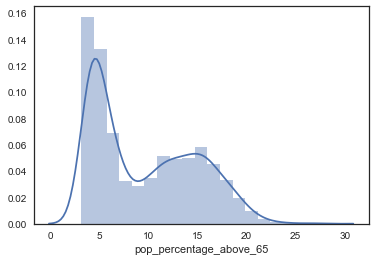

In [36]:
sns.distplot(features_selected_train.pop_percentage_above_65+1)

In [37]:
min(features_selected_train.pop_percentage_above_65+1)

3.14016072956877

['mort_rate_under_5', 'pop_percentage_above_65', 'pop_percentage_under_14', 'pop_percentage_15_to_64', 'life_expectancy', 'density', 'gdp', 'long term orientation', 'indulgence vs restraint', 'mort_rate_under_5^2', 'mort_rate_under_5 pop_percentage_above_65', 'mort_rate_under_5 density', 'mort_rate_under_5 long term orientation', 'mort_rate_under_5 indulgence vs restraint', 'pop_percentage_above_65 pop_percentage_under_14', 'pop_percentage_above_65 density', 'pop_percentage_above_65 long term orientation', 'pop_percentage_above_65 indulgence vs restraint', 'mort_rate_infant life_expectancy', 'pop_percentage_under_14 life_expectancy', 'pop_percentage_under_14 long term orientation', 'pop_percentage_under_14 indulgence vs restraint', 'pop_percentage_under_14 continent_Europe', 'density gdp', 'density continent_Europe', 'gdp^2', 'gdp long term orientation', 'long term orientation indulgence vs restraint', 'long term orientation continent_Europe', 'indulgence vs restraint continent_Europe'

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


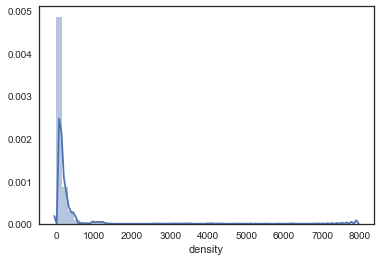

In [38]:
print(list(features_selected_train))

sns.distplot(features_selected_train['density'])

In [39]:
features_selected_test = features_135_test[features_selected_train.columns]
y_pred = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print(model.score(features_selected_test, y_test))

features_selected_test['answer'] = y_pred

features_selected_test



0.29722597918136984
0.17503567124089903
0.4183726463822641
0.9543484983782646


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                               
DNK          1998                 5.8                15.020549   
PER          1989                85.0                 3.939242   
GHA          1997               108.1                 2.998090   
ESP          1978                17.7                10.780642   
SGP          1990                 7.7                 5.598826   
ESP          2004                 4.9                16.699717   
SGP          2000                 3.9                 7.345067   
IND          1979               172.8                 3.615353   
DZA          1970               240.0                 3.515545   
RUS          2004                14.9                13.799766   
SVK          2009                 7.2                12.257997   
MKD          1997                19.6                 9.194193   
ISL          2007                 3.0                11.788008   
JOR          1966               109.6                 3.562868   
UKR          2004                15.2                15.704347   
BFA          1983               224.4                 3.295466   
PER          1973               150.3                 3.535870   
ITA          1974                25.3                11.920168   
PHL          1965                90.7                 3.006699   
MEX          1997                31.8                 4.811100   
UGA          1967               194.8                 2.588223   
TUR          2000                39.2                 6.091985   
URY          1984                29.7                10.888528   
EGY          2006                34.5                 4.852082   
AUS          1977                15.2                 9.103350   
GHA          1989               131.7                 2.750755   
JOR          1983                48.3                 3.403300   
ZAF          1992                59.3                 3.562497   
BRA          2004                26.6                 5.741907   
JPN          2005                 3.7                19.652881   
...                               ...                      ...   
ROU          2010                11.5                15.687840   
KGZ          2007                35.8                 5.243366   
SVN          1998                 6.2                13.447446   
NGA          1979               217.8                 2.796729   
DNK          1984                 9.6                14.990858   
PRT          1996                 9.1                15.267090   
ZMB          1979               155.6                 2.677630   
SWE          1981                 8.2                16.560953   
             1988                 7.3                17.706648   
DNK          1971                15.8                12.537300   
BRA          2001                32.5                 5.220856   
MYS          1987                19.2                 3.703667   
ALB          2012                10.7                11.418615   
TTO          2015                27.7                 9.411790   
JOR          2013                19.2                 3.702946   
ISL          2011                 2.6                12.264314   
ITA          1994                 8.0                16.240590   
PRT          2011                 3.8                19.062288   
CHE          1965                22.5                10.447111   
TZA          1994               158.9                 2.745553   
GBR          1985                11.4                15.160863   
VEN          1984                37.5                 3.411979   
MEX          1991                43.3                 4.342597   
AUS          1974                18.4                 8.633691   
GHA          1979               168.1                 2.606860   
ISL          1983                 8.2                10.037328   
GHA          1965               202.5                 2.434392   
VNM          2001                28.4                 6.5064

Text(0,0.5,'Predictions')

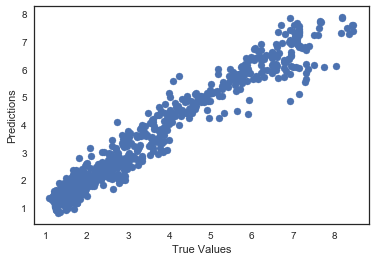

In [40]:
from matplotlib import pyplot as plt

plt.scatter(y_test, y_pred)

plt.xlabel('True Values')
plt.ylabel('Predictions')

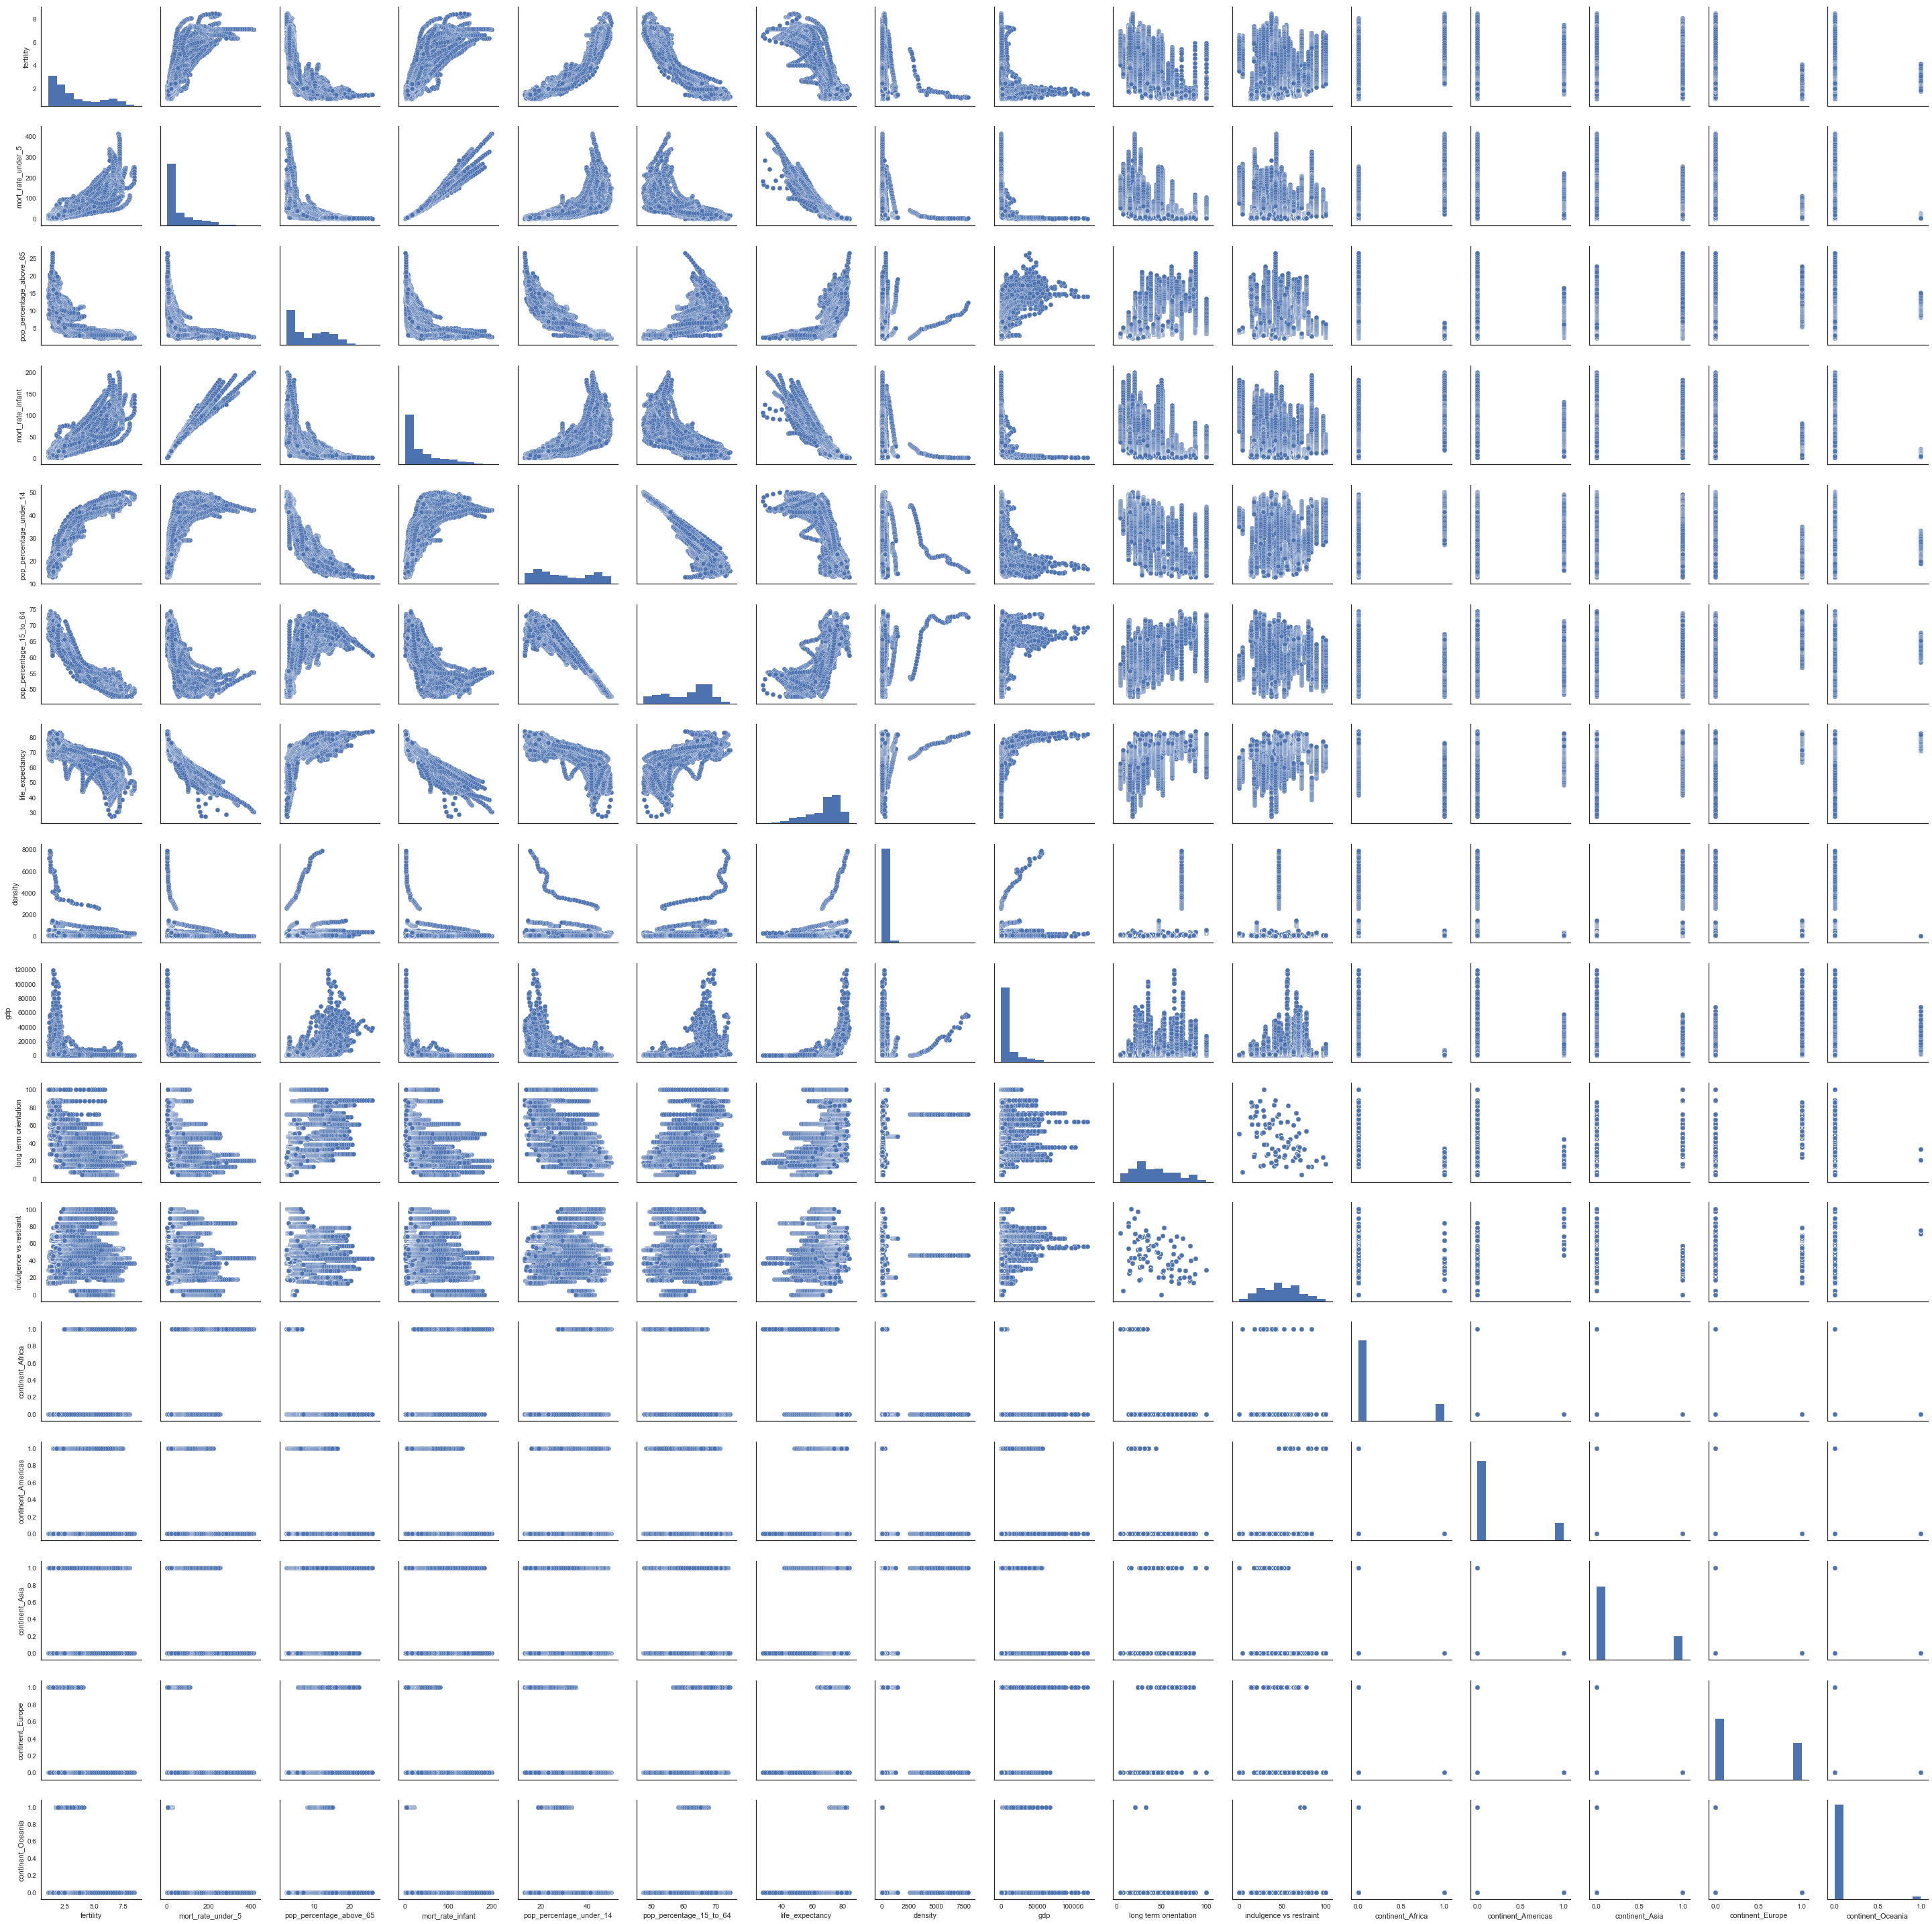

In [42]:
sns.pairplot(df)

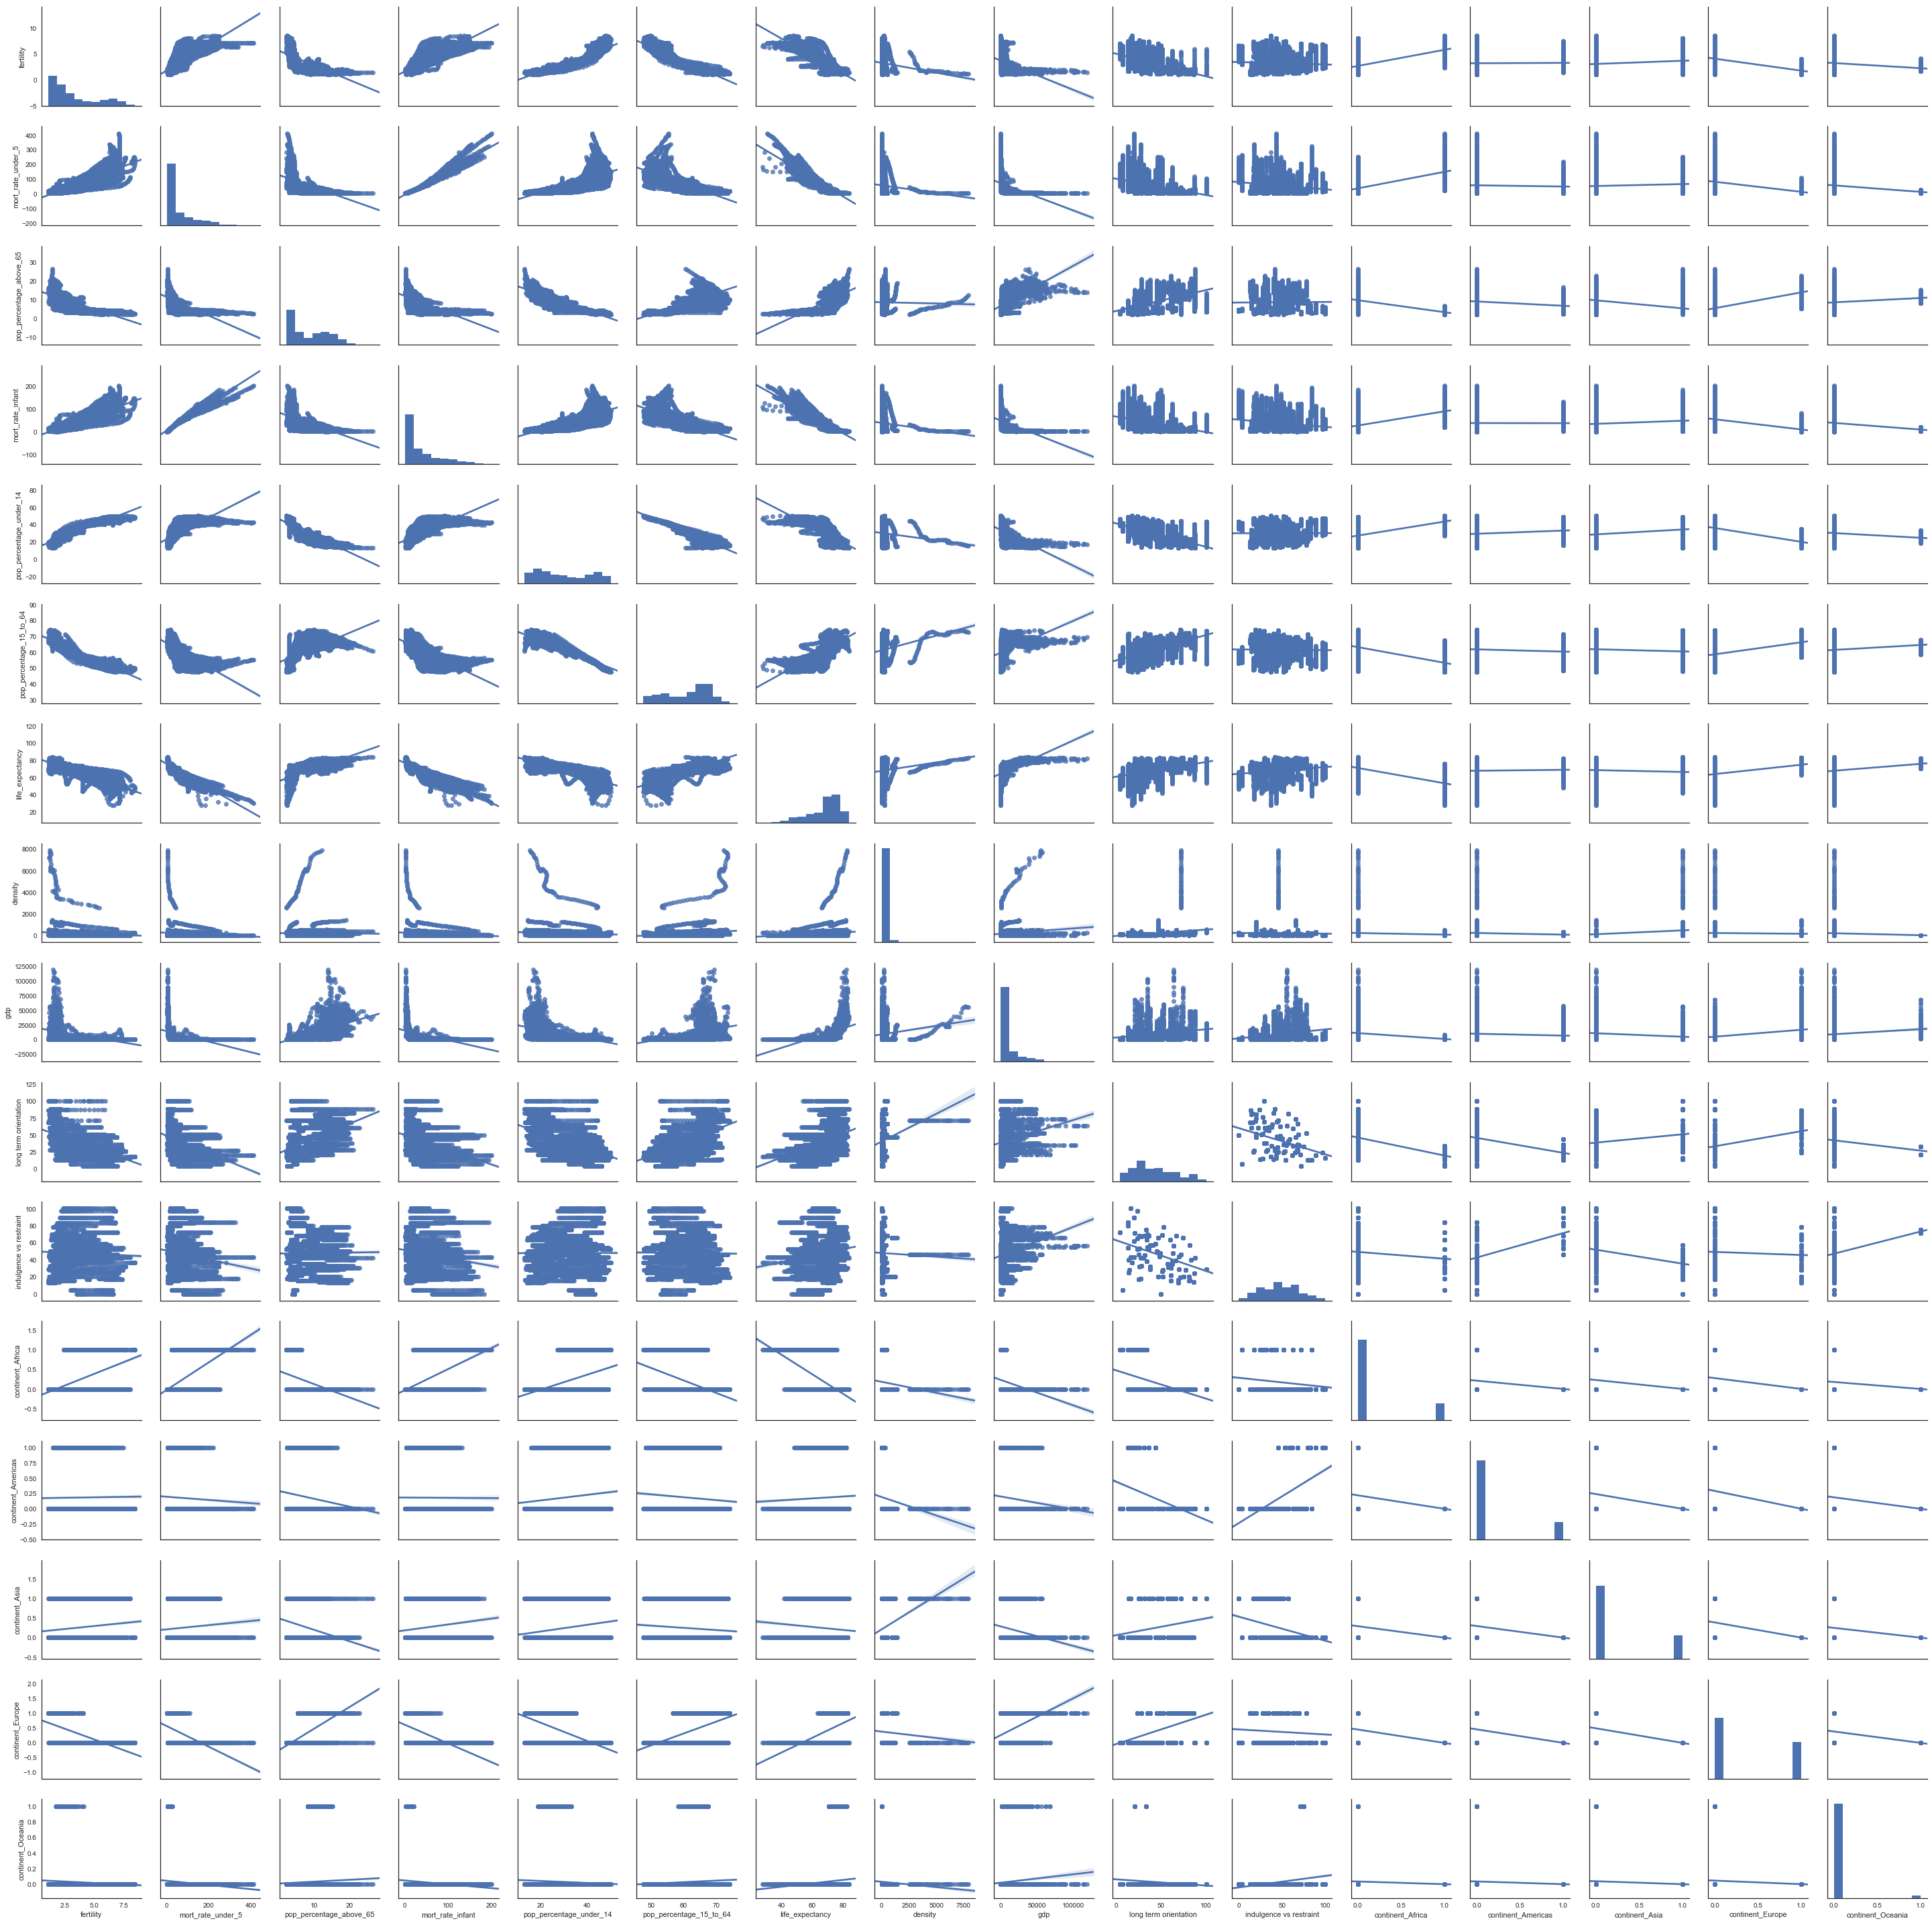

In [43]:
#useless comment
sns.pairplot(df, kind="reg")

In [41]:
import statsmodels.api as sm
import pylab
import statsmodels.formula.api as smf

auto = features_selected_test
est = smf.ols('fertility~all other', auto).fit()
est.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

# Wrapper Methods

Wrapper methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated and compared to other combinations. A predictive model us used to evaluate a combination of features and assign a score based on model accuracy.

The search process may be methodical such as a best-first search, it may stochastic such as a random hill-climbing algorithm, or it may use heuristics, like forward and backward passes to add and remove features.

An example if a wrapper method is the recursive feature elimination algorithm.



![alt text](Wrapper_1.webp)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(lm, n_features_to_select=10)
rfe.fit(features_selected_train,y_train)

In [ ]:
def ranking(ranks, names, order=1):

    ranks = map(lambda x: round(x,2), ranks)
    return list(sorted(zip(ranks, names),reverse=True))

In [ ]:
rankings = ranking(np.abs(lm.coef_), features_selected_train.columns)

In [ ]:
rankings[:15]

In [ ]:
[item[1] for item in rankings[0:15]]


In [ ]:
final_columns = [item[1] for item in rankings[0:15]]


In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train[final_columns], y_train)

In [ ]:
features_selected_test = features_135_test[final_columns]
y_pred = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print(model.score(features_selected_test, y_test))


# Embedded Methods

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

Examples of regularization algorithms are the LASSO, Elastic Net and Ridge Regression.

![alt text](Embedded_1.webp)